In [0]:
!pip install landsatxplore
!pip install gdal
!pip install rasterio

In [0]:
!mkdir data
!mkdir data/scene1
!mkdir data/scene2
!mkdir data/scene3



---



**IMPORT LIBRARIES**

In [0]:
import rasterio
from rasterio.plot import show
import gdal
from gdalconst import GA_ReadOnly 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import subprocess
IMG=2200
import cv2



---



**DOWNLOAD REFERENCE DATA SET**

In [5]:
!wget https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/clc2018_clc2018_v2018_20_raster100m.zip

--2019-12-26 15:48:06--  https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
Resolving land.copernicus.eu (land.copernicus.eu)... 34.247.152.136
Connecting to land.copernicus.eu (land.copernicus.eu)|34.247.152.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221703454 (211M) [application/zip]
Saving to: ‘7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip’

7ac95361f9ac3cecdf3 100%[===================>] 211.43M  6.22MB/s    in 16s     

2019-12-26 15:48:24 (12.8 MB/s) - ‘7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip’ saved [221703454/221703454]

Archive:  /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
 extracting: clc2018_clc2018_v2018_20_raster100m.zip  
Archive:  /content/clc2018_clc2018_v2018_20_raster100m.zip
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.txt  
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif  
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_C

**TRANSFORM REFERENCE DATA**

In [6]:
!gdalwarp -co "COMPRESS=DEFLATE" -t_srs EPSG:32618  '/content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif' europe-clc.tif

Creating output file that is 54709P x 82959L.
Processing input file /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Using internal nodata values (e.g. -32768) for image /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Copying nodata values from source /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif to destination europe-clc.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.




---



**DOWNLOAD TEMPORAL SCENES OF LONDON REGION-WEST EUROPE**

In [7]:
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('uname', 'pwd')
ee.download(scene_id='LC08_L1TP_201024_20180901_20180912_01_T1', output_dir='./data/scene1')
ee.download(scene_id='LC08_L1TP_201024_20180629_20180716_01_T1', output_dir='./data/scene2')
ee.download(scene_id='LC08_L1TP_201024_20170610_20170627_01_T1', output_dir='./data/scene3')



878MB [01:56, 7.91MB/s]                           
902MB [06:33, 2.40MB/s]                           
911MB [06:52, 2.31MB/s]                           


'./data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1.tar.gz'

In [0]:
ee.logout()




---



**PREPROCESS SCENES**

In [9]:
!tar xvzf '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1.tar.gz' -C './data/scene1'
!tar xvzf '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1.tar.gz' -C './data/scene2'
!tar xvzf '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1.tar.gz' -C './data/scene3'

LC08_L1TP_201024_20180901_20180912_01_T1_B1.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B2.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B3.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B4.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B5.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B6.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B7.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B8.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B9.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B10.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_B11.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_BQA.TIF
LC08_L1TP_201024_20180901_20180912_01_T1_ANG.txt
LC08_L1TP_201024_20180901_20180912_01_T1_MTL.txt
LC08_L1TP_201024_20180629_20180716_01_T1_B1.TIF
LC08_L1TP_201024_20180629_20180716_01_T1_B2.TIF
LC08_L1TP_201024_20180629_20180716_01_T1_B3.TIF
LC08_L1TP_201024_20180629_20180716_01_T1_B4.TIF
LC08_L1TP_201024_20180629_20180716_01_T1_B5.TIF
LC08_L1TP_201024_20180629_20180716_01_T1_B6.TIF
LC08_L1TP_201024_20180629_20180716_

In [10]:
!gdalwarp -co "COMPRESS=DEFLATE" -t_srs EPSG:32631  /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif europe.tif

Creating output file that is 67782P x 53428L.
Processing input file /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Using internal nodata values (e.g. -32768) for image /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Copying nodata values from source /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif to destination europe.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [11]:
!gdalinfo europe.tif

Driver: GTiff/GeoTIFF
Files: europe.tif
Size is 67782, 53428
Coordinate System is:
PROJCS["WGS 84 / UTM zone 31N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32631"]]
Origin = (-2807002.923463668208569,8694832.590992318466306)
Pixel Size = (107.181020350150291,-107.181020350150291)
Metadata:
  AREA_OR_POINT=Area
Imag

In [12]:
data=gdal.Open('/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B1.TIF',GA_ReadOnly) 
geoTransform=data.GetGeoTransform() 
minx=geoTransform[0] 
maxy=geoTransform[3] 
maxx = minx + geoTransform[1] * data.RasterXSize 
miny = maxy + geoTransform[5] * data.RasterYSize 
subprocess.call('gdal_translate -projwin ' + ' '.join([str(x) for x in [minx, maxy, maxx, miny]]) + ' -of GTiff europe.tif img_out.tif', shell=True) 

0

In [13]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/img_out.tif' 'Y.tif'

Input file size is 2262, 2287
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.


SCENE 1 PREPROCESSING

In [14]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B2.TIF' 's1b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B3.TIF' 's1b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B4.TIF' 's1b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B5.TIF' 's1b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B6.TIF' 's1b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene1/LC08_L1TP_201024_20180901_20180912_01_T1_B7.TIF' 's1b7.tif'

Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warni

SCENE 2 PREPROCESSING

In [15]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B2.TIF' 's2b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B3.TIF' 's2b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B4.TIF' 's2b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B5.TIF' 's2b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B6.TIF' 's2b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene2/LC08_L1TP_201024_20180629_20180716_01_T1_B7.TIF' 's2b7.tif'

Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8081, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warni

SCENE 3 PREPROCESSING

In [16]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B2.TIF' 's3b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B3.TIF' 's3b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B4.TIF' 's3b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B5.TIF' 's3b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B6.TIF' 's3b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/data/scene3/LC08_L1TP_201024_20170610_20170627_01_T1_B7.TIF' 's3b7.tif'

Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 8091, 8171
Warning 6: driver GTiff does not support creation option QUALITY
Warni



---



**HELPER** **FUNCTIONS**

In [0]:
#CALCULATE SPECTRAL INDICES LIKE NDVI, NDBI etc..
def calculate_spectral_index(band1,band2):
  ndbi=np.where((band1+band2)==0.,0,(band1-band2)/(band1+band2))
  return ndbi

def read_band_data(fileName):
        a=gdal.Open(fileName)
        a1=a.GetRasterBand(1).ReadAsArray().astype(dtype='float')
        return a1


In [0]:
#CALCULATE SPECTRAL INDICES FOR A SINGLE SCENE
def calculate_all_indices_for_a_scene(root_name):
        temp_list=[]
        b2=read_band_data((root_name+'b'+str(2)+'.tif'))
        b3=read_band_data((root_name+'b'+str(3)+'.tif'))
        b4=read_band_data((root_name+'b'+str(4)+'.tif'))
        b5=read_band_data((root_name+'b'+str(5)+'.tif'))
        b6=read_band_data((root_name+'b'+str(6)+'.tif'))
        b7=read_band_data((root_name+'b'+str(7)+'.tif'))

        temp_list.append(calculate_spectral_index(b6,b5))
        temp_list.append(calculate_spectral_index(b3,b5))
        temp_list.append(calculate_spectral_index(b5,b4))
        temp_list.append(calculate_spectral_index(b6,b7))
        temp_list.append(calculate_spectral_index(b4,b2))
        temp_list.append(calculate_spectral_index(b3,b2))

        return temp_list

In [19]:
scene1_indices=calculate_all_indices_for_a_scene('s1')
scene2_indices=calculate_all_indices_for_a_scene('s2')
scene3_indices=calculate_all_indices_for_a_scene('s3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
#CALCULATE TEMPORAL STATISTICS LIKE MEAN, MIN, MAX etc..
def calc_temporal_statistics(scene1,scene2,scene3):
  temp_min = np.zeros(shape=(IMG,IMG))
  temp_max = np.zeros(shape=(IMG,IMG))
  temp_mean = np.zeros(shape=(IMG,IMG))
  temp_std = np.zeros(shape=(IMG,IMG))
  temp_mean_slope = np.zeros(shape=(IMG,IMG))

  for i in tqdm(range(0,IMG)):
    for j in range(0,IMG):
      x=scene1[i][j]
      y=scene2[i][j]
      z=scene3[i][j]

      temp_min[i][j]=np.amin([x,y,z])
      temp_max[i][j]=np.amax([x,y,z])
      temp_mean[i][j]=np.mean([x,y,z])
      temp_std[i][j]=np.std([x,y,z])  
      temp_mean_slope[i][j]=np.average(np.diff([x,y,z]))
      
  return (temp_min,temp_max,temp_mean,temp_std,temp_mean_slope)




---



**COMPUTE FEATURES BASED ON TEMPORAL CHARACTERSITCS OF DIFFERENT SCENES**

In [21]:
ndbi_statistics=calc_temporal_statistics(scene1_indices[0],scene2_indices[0],scene3_indices[0])

In [22]:
mndwi_statistics=calc_temporal_statistics(scene1_indices[1],scene2_indices[1],scene3_indices[1])

In [23]:
ndvi_statistics=calc_temporal_statistics(scene1_indices[2],scene2_indices[2],scene3_indices[2])

In [24]:
ndmir_statistics=calc_temporal_statistics(scene1_indices[3],scene2_indices[3],scene3_indices[3])

In [25]:
ndrb_statistics=calc_temporal_statistics(scene1_indices[4],scene2_indices[4],scene3_indices[4])

In [26]:
ndgb_statistics=calc_temporal_statistics(scene1_indices[5],scene2_indices[5],scene3_indices[5])

**EXAMPLE: VISUALIZING TEMPORAL MAX OF NDBI**

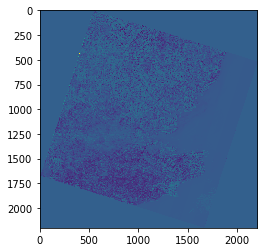

In [27]:
plt.imshow(ndbi_statistics[1]) 



---



**PREPARING TRAINING DATA - LONDON REGION, WEST EUROPE**

In [28]:
tif2=gdal.Open('Y.tif')
Y_raster = tif2.GetRasterBand(1).ReadAsArray()
Y_raster[Y_raster <= 100] = 999
Y_raster[(Y_raster > 100)&(Y_raster <= 150)] = 0
Y_raster[Y_raster > 150] = 255
print("UNIQUE CLASSES: ", np.unique(Y_raster))
Y_list=Y_raster.flatten().tolist()
y=np.reshape(Y_list,(IMG*IMG,1))
print(y.shape)

UNIQUE CLASSES:  [  0 255]
(4840000, 1)


In [29]:
records=[]
for i in tqdm(range(0,5)):
          records.append(ndbi_statistics[i].flatten().tolist())
          records.append(mndwi_statistics[i].flatten().tolist())
          records.append(ndvi_statistics[i].flatten().tolist())
          records.append(ndmir_statistics[i].flatten().tolist())
          records.append(ndrb_statistics[i].flatten().tolist())
          records.append(ndgb_statistics[i].flatten().tolist())


In [30]:
record=np.column_stack(records)
X=np.append(record, y, axis=1)
print('FULL TRAINING DATA SHAPE: ')
print(X.shape)


FULL TRAINING DATA SHAPE: 
(4840000, 31)


In [0]:
X_small=X[np.random.choice(np.shape(X)[0],5000, replace=False), :]
X_train=X_small[:,0:30]
Y_train=X_small[:,30]



---



**CLASSIFICATION :  SUPPORT VECTOR MACHINE - RBF KERNEL**

TRAINING

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.1,1, 10,30,50, 100,500, 1000], 'gamma': [0.001, 0.0001,10,20,50,100,500], 'kernel': ['rbf']}
]

classifier = GridSearchCV(SVC(), param_grid=parameter_candidates)
classifier.fit(X_train, Y_train)   


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 30, 50, 100, 500, 1000],
                          'gamma': [0.001, 0.0001, 10, 20, 50, 100, 500],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
print('Best score:', classifier.best_score_) 
print('Best C value:',classifier.best_estimator_.C) 
print('Best Gamma value:',classifier.best_estimator_.gamma)

Best score: 0.9274
Best C value: 10
Best Gamma value: 10


In [38]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=classifier.best_estimator_.C,gamma=classifier.best_estimator_.gamma)
svclassifier.fit(X_train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
Y_pred = svclassifier.predict(X[:,0:30])

METRICS ON TRAINING DATA

In [40]:
from sklearn.metrics import classification_report
print(classification_report(X[:,30], Y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.44      0.56    513523
       255.0       0.94      0.99      0.96   4326477

    accuracy                           0.93   4840000
   macro avg       0.87      0.71      0.76   4840000
weighted avg       0.92      0.93      0.92   4840000





---



**VISUALIZATION OF HUMAN SETTLEMENT**

ORIGINAL RGB IMAGE

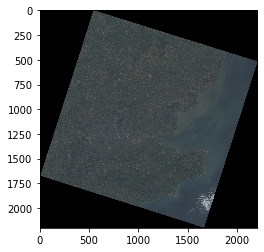

In [41]:
s4=gdal.Open('s2b4.tif')
red = s4.GetRasterBand(1).ReadAsArray()
r=red.astype(dtype='int')

s3 = gdal.Open('s2b3.tif')
green = s3.GetRasterBand(1).ReadAsArray()
g=green.astype(dtype='int')

s2 = gdal.Open('s2b2.tif')
blue = s2.GetRasterBand(1).ReadAsArray()
b=blue.astype(dtype='int')

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(r)
greenn = normalize(g)
bluen = normalize(b)
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

CLASSIFICATION RESULTS : BLACK=BUILT UP, WHITE=OTHERS

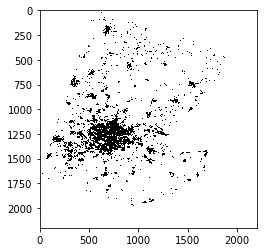

In [42]:
plt.gray()
plt.imshow(np.reshape(Y_pred,(2200,2200)))

**TEST DATA - BANGALORE REGION, INDIA (UNSEEN DATA)**

In [0]:
!mkdir test-data
!mkdir test-data/scene1
!mkdir test-data/scene2
!mkdir test-data/scene3

In [44]:
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('uname', 'pwd')
ee.download(scene_id='LC08_L1TP_144051_20190516_20190521_01_T1', output_dir='./test-data/scene1')
ee.download(scene_id='LC08_L1TP_144051_20190108_20190130_01_T1', output_dir='./test-data/scene2')
ee.download(scene_id='LC08_L1TP_144051_20170408_20170414_01_T1', output_dir='./test-data/scene3')

923MB [06:24, 2.52MB/s]                          
900MB [11:55, 1.32MB/s]                           
910MB [09:53, 1.61MB/s]                           


'./test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1.tar.gz'

In [0]:
ee.logout()

In [46]:
!tar xvzf '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1.tar.gz' -C './test-data/scene1'
!tar xvzf '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1.tar.gz' -C './test-data/scene2'
!tar xvzf '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1.tar.gz' -C './test-data/scene3'

LC08_L1TP_144051_20190516_20190521_01_T1_B1.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B2.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B3.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B4.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B5.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B6.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B7.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B8.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B9.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B10.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_B11.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_BQA.TIF
LC08_L1TP_144051_20190516_20190521_01_T1_ANG.txt
LC08_L1TP_144051_20190516_20190521_01_T1_MTL.txt
LC08_L1TP_144051_20190108_20190130_01_T1_B1.TIF
LC08_L1TP_144051_20190108_20190130_01_T1_B2.TIF
LC08_L1TP_144051_20190108_20190130_01_T1_B3.TIF
LC08_L1TP_144051_20190108_20190130_01_T1_B4.TIF
LC08_L1TP_144051_20190108_20190130_01_T1_B5.TIF
LC08_L1TP_144051_20190108_20190130_01_T1_B6.TIF
LC08_L1TP_144051_20190108_20190130_

SCENE 1 PREPROCESSING

In [47]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B2.TIF' 'test-s1b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B3.TIF' 'test-s1b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B4.TIF' 'test-s1b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B5.TIF' 'test-s1b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B6.TIF' 'test-s1b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene1/LC08_L1TP_144051_20190516_20190521_01_T1_B7.TIF' 'test-s1b7.tif'

Input file size is 7561, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7561, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7561, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7561, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7561, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warni

SCENE 2 PREPROCESSING

In [48]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B2.TIF' 'test-s2b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B3.TIF' 'test-s2b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B4.TIF' 'test-s2b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B5.TIF' 'test-s2b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B6.TIF' 'test-s2b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene2/LC08_L1TP_144051_20190108_20190130_01_T1_B7.TIF' 'test-s2b7.tif'

Input file size is 7541, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7541, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7541, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7541, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7541, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warni

SCENE 3 PREPROCESSING

In [49]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B2.TIF' 'test-s3b2.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B3.TIF' 'test-s3b3.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B4.TIF' 'test-s3b4.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B5.TIF' 'test-s3b5.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B6.TIF' 'test-s3b6.tif'
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 2200 2200 -r bilinear '/content/test-data/scene3/LC08_L1TP_144051_20170408_20170414_01_T1_B7.TIF' 'test-s3b7.tif'

Input file size is 7551, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7551, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7551, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7551, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warning 6: driver GTiff does not support creation option PROGRESSIVE
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 7551, 7711
Warning 6: driver GTiff does not support creation option QUALITY
Warni

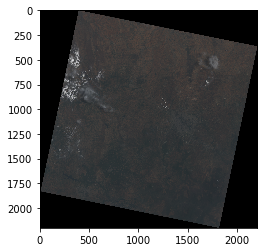

In [51]:
s4=gdal.Open('test-s1b4.tif')
red = s4.GetRasterBand(1).ReadAsArray()
r=red.astype(dtype='int')

s3 = gdal.Open('test-s1b3.tif')
green = s3.GetRasterBand(1).ReadAsArray()
g=green.astype(dtype='int')

s2 = gdal.Open('test-s1b2.tif')
blue = s2.GetRasterBand(1).ReadAsArray()
b=blue.astype(dtype='int')

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))
redn = normalize(r)
greenn = normalize(g)
bluen = normalize(b)
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)


In [52]:
test_scene1_indices=calculate_all_indices_for_a_scene('test-s1')
test_scene2_indices=calculate_all_indices_for_a_scene('test-s2')
test_scene3_indices=calculate_all_indices_for_a_scene('test-s3')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [53]:
test_ndbi_statistics=calc_temporal_statistics(test_scene1_indices[0],test_scene2_indices[0],test_scene3_indices[0])
test_mndwi_statistics=calc_temporal_statistics(test_scene1_indices[1],test_scene2_indices[1],test_scene3_indices[1])
test_ndvi_statistics=calc_temporal_statistics(test_scene1_indices[2],test_scene2_indices[2],test_scene3_indices[2])
test_ndmir_statistics=calc_temporal_statistics(test_scene1_indices[3],test_scene2_indices[3],test_scene3_indices[3])
test_ndrb_statistics=calc_temporal_statistics(test_scene1_indices[4],test_scene2_indices[4],test_scene3_indices[4])
test_ndgb_statistics=calc_temporal_statistics(test_scene1_indices[5],test_scene2_indices[5],test_scene3_indices[5])

**VISUALIZING NDBI OF BANGALORE REGION, INDIA**

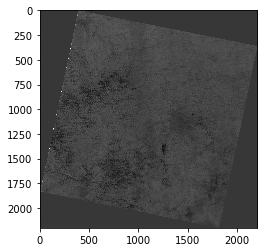

In [54]:
plt.imshow(test_ndbi_statistics[1]) 

In [55]:
test_records=[]
for i in tqdm(range(0,5)):
          test_records.append(test_ndbi_statistics[i].flatten().tolist())
          test_records.append(test_mndwi_statistics[i].flatten().tolist())
          test_records.append(test_ndvi_statistics[i].flatten().tolist())
          test_records.append(test_ndmir_statistics[i].flatten().tolist())
          test_records.append(test_ndrb_statistics[i].flatten().tolist())
          test_records.append(test_ndgb_statistics[i].flatten().tolist())

In [56]:
test_record=np.column_stack(test_records)
print('FULL TESTING DATA SHAPE: ')
print(test_record.shape)

FULL TESTING DATA SHAPE: 
(4840000, 30)


In [0]:
preds = svclassifier.predict(test_record)

**FINAL PREDICTION On UNSEEN DATA - BANGALORE REGION,INDIA**

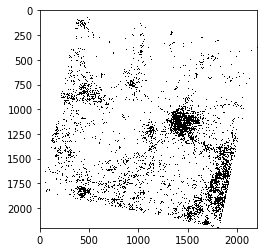

In [58]:
plt.gray()
plt.imshow(np.reshape(preds,(2200,2200)))

In [59]:
cv2.imwrite("prediction.tif",np.reshape(preds,(2200,2200)))

True